# Deep Value-based Reinforcement Learning

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2023/master/logo.jpg" style="float: left; width: 15%" />

[INF639-2023](https://moodle.polytechnique.fr/course/view.php?id=17866) Lab session #1

2019-2023 Jérémie Decock

[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jeremiedecock/polytechnique-inf639-2023-students/blob/master/lab1_deep_value-based_reinforcement_learning.ipynb)

[![My Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jeremiedecock/polytechnique-inf639-2023-students/master?filepath=lab1_deep_value-based_reinforcement_learning.ipynb)

[![NbViewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/jeremiedecock/polytechnique-inf639-2023-students/blob/master/lab1_deep_value-based_reinforcement_learning.ipynb)

[![Local](https://img.shields.io/badge/Local-Save%20As...-blue)](https://github.com/jeremiedecock/polytechnique-inf639-2023-students/raw/master/lab1_deep_value-based_reinforcement_learning.ipynb)

## Introduction

The aim of this lab is to provide an in-depth exploration of the most renowned value-based reinforcement learning techniques, specifically *Deep Q-Networks* and its enhancements.

In this Python notebook, you will implement and evaluate *Deep Q-Networks* (DQN) and its various adaptations.

You can either:
- open, edit and execute the notebook in *Google Colab* following this link: https://colab.research.google.com/github/jeremiedecock/polytechnique-inf639-2023-students/blob/master/lab1_deep_value-based_reinforcement_learning.ipynb ; this is the **recommended** choice as you have nothing to install on your computer
- open, edit and execute the notebook in *MyBinder* (if for any reason the Google Colab solution doesn't work): https://mybinder.org/v2/gh/jeremiedecock/polytechnique-inf639-2023-students/master?filepath=lab1_deep_value-based_reinforcement_learning.ipynb
- download, edit and execute the notebook on your computer if Python3 and JypyterLab are already installed: https://github.com/jeremiedecock/polytechnique-inf639-2023-students/raw/master/lab1_deep_value-based_reinforcement_learning.ipynb

If you work with Google Colab or MyBinder, **remember to save or download your work regularly or you may lose it!**

## Setup the Python environment

### Install required libraries

**Note**: This notebook relies on several libraries including `PyTorch`, `Gymnasium`, `NumPy`, `Pandas`, `Seaborn`, `imageio`, `pygame`, and `tqdm`.
A complete list of dependencies can be found in the provided [requirements.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2023-students/master/requirements.txt) file.

If you run this notebook on your own comuter, to install these dependencies, download the [requirements.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-inf639-2023-students/master/requirements.txt) file and place it in the same directory as this notebook. Then, execute the following command:

```
pip install -r requirements.txt
```

If you're using Google Colab, uncomment and run the following cell ; will automatically handle this installation for you.

In [1]:
! pip install gymnasium imageio inf581==1.0.4 matplotlib numpy pandas seaborn torch tqdm

  Attempting uninstall: inf581
    Found existing installation: inf581 1.0.3
    Uninstalling inf581-1.0.3:
      Successfully uninstalled inf581-1.0.3


### Import required packages

In [1]:
%matplotlib inline

import collections
import matplotlib.pyplot as plt
import gymnasium as gym
import itertools
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
from torch.optim.lr_scheduler import _LRScheduler
from tqdm.notebook import tqdm
from typing import List, Tuple, Deque, Optional, Callable

from inf581 import *

from IPython.display import Image   # To display GIF images in the notebook

In [2]:
sns.set_context("talk")

## Deep value-based reinforcement learning

Deep reinforcement learning methods like DQN (Deep Q-Networks) are significant advancements over tabular methods such as Q-Learning because they can handle complex, high-dimensional environments that were previously intractable. While Q-Learning is limited to environments where the state and action spaces are sufficiently small to maintain a table of values, DQN uses neural networks to approximate the Q-value function, allowing it to generalize across similar states and scale to problems with vast state spaces. This enables DQN to learn optimal policies for tasks like video games, robotic control, and other applications where the number of possible states is extraordinarily large.

While DQN was designed to tackle large environments like Atari games, the primary focus of this lab is to delve into the underlying algorithms, understand them thoroughly, and evaluate them comprehensively. It's important to note that working with not-so-deep networks captures the essence of deep reinforcement learning, excluding the computational expense. The transition from tabular Q-learning to DQN involves significant implications, primarily due to the ability of DQN to handle high-dimensional state spaces. Moving from DQN to very-deep-DQN is primarily a matter of scale and computational resources. The core principles remain the same, and understanding these principles is the key to mastering reinforcement learning, regardless of the complexity of the network used.
For these reasons, in this lab, we will focus on studying the CartPole environment. The CartPole problem is a classic in reinforcement learning, and it provides a simpler and more manageable context for understanding the principles of DQN. The convergence in the CartPole environment is much faster than in Atari games - typically within a minute, as opposed to approximately 10 hours on a well-equipped personal computer for Atari games. This allows us to experiment and iterate more quickly, facilitating a deeper understanding of the algorithms at play.

## Part 1: Hands on Cart Pole environment

For the purpose of focusing on the algorithms, we will use standard environments provided by the Gymnasium suite.
Gymnasium provides controllable environments (https://gymnasium.farama.org/environments/classic_control/) for research in reinforcement learning.
Especially, we will try to solve the CartPole-v1 environment (c.f. https://gymnasium.farama.org/environments/classic_control/cart_pole/) which offers a continuous state space and discrete action space.
The Cart Pole task consists in maintaining a pole in a vertical position by moving a cart on which the pole is attached with a joint.
No friction is considered.
The task is supposed to be solved if the pole stays up-right (within 15 degrees) for 195 steps in average over 100 episodes while keeping the cart position within reasonable bounds.
The state is given by $\{x,\frac{\partial x}{\partial t},\omega,\frac{\partial \omega}{\partial t}\}$ where $x$ is the position of the cart and $\omega$ is the angle between the pole and vertical position.
There are only two possible actions: $a \in \{0, 1\}$ where $a = 0$ means "push the cart to the LEFT" and $a = 1$ means "push the cart to the RIGHT".

### Exercise 1: Hands on Cart Pole

**Task 1.1:** refer to the following link [CartPole Environment](https://gymnasium.farama.org/environments/classic_control/cart_pole/) to familiarize yourself with the CartPole environment.

**Note:** for a refresher on the key concepts of Gymnasium, you can visit this [Basic Usage Guide](https://gymnasium.farama.org/content/basic_usage/).

Print some information about the environment:

In [3]:
env = gym.make('CartPole-v1')

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n.item()

print(f"State space size is: { state_dim }")
print(f"State upper bounds: { env.observation_space.high }")
print(f"State lower bounds: { env.observation_space.low }")
print(f"Action space size is: { action_dim }")
print("Actions are: {" + ", ".join([str(a) for a in range(env.action_space.n)]) + "}")
env.close()

State space size is: 4
State upper bounds: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
State lower bounds: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Action space size is: 2
Actions are: {0, 1}


**Task 2:** Run the following cells and check different basic 
policies (for instance constant actions or randomly drawn actions) to discover the CartPole environment.
Although this environment has easy dynamics that can be computed analytically, we will solve this problem with Policy Gradient based Reinforcement learning.

### Test the CartPole environment with a constant policy

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]
[-0.01239953 -0.04638267  0.03988359 -0.04931961]


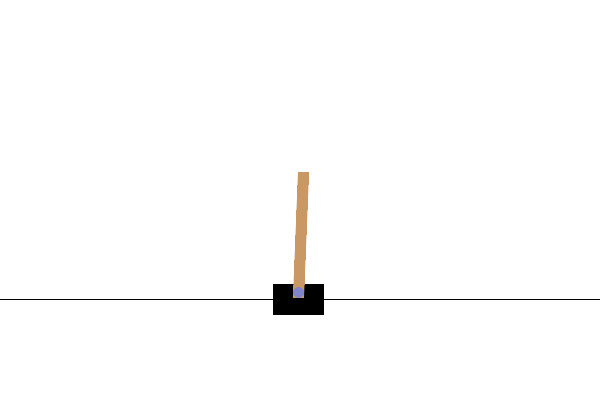

In [6]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

observation, info = env.reset()
done = False

for t in range(50):
    env.render_wrapper.render()

    if not done:
        print(observation)
    else:
        print("x", end="")

    ### BEGIN SOLUTION ###

    env.step(0)

    ### END SOLUTION ###


print()
env.close()

env.render_wrapper.make_gif("lab1_ex1left")

[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]
[-0.04512801 -0.02012568 -0.03915029  0.0339907 ]


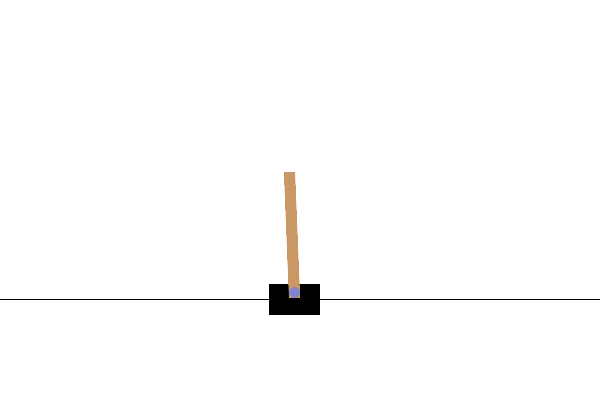

In [7]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

observation, info = env.reset()
done = False

for t in range(50):
    env.render_wrapper.render()

    if not done:
        print(observation)
    else:
        print("x", end="")

    ### BEGIN SOLUTION ###
    env.step(1)

    ### END SOLUTION ###

print()
env.close()

env.render_wrapper.make_gif("lab1_ex1right")

### Test the CartPole environment with a random policy

[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]
[-0.03204462  0.04137226 -0.0259054  -0.01902069]


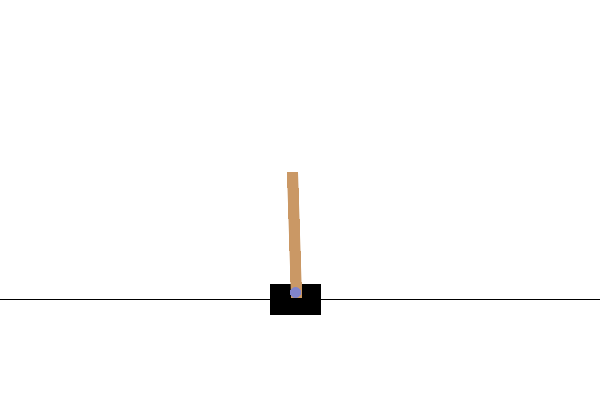

In [8]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

for episode_index in range(5):
    observation, info = env.reset()
    done = False

    for t in range(70):
        env.render_wrapper.render()

        if not done:
            print(observation)
        else:
            print("x", end="")
        
        ### BEGIN SOLUTION ###

        env.step(np.random.randint(0, 2))
        # env.action_space.sample()

        ### END SOLUTION ###

    print()
    env.close()

env.render_wrapper.make_gif("lab1_ex1random")

## Part 2: A naive deep value-based agent

In this section, we will begin our exploration of deep value-based reinforcement learning methods. Our first step will be to write a naive implementation of a version of Q-Learning, where the Q-function is approximated by a neural network. This approach combines traditional Q-Learning with the power of function approximation provided by neural networks, allowing us to handle environments with large state spaces.

### The algorithm

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega}}$ $)$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ $
          \mathbf{\omega} \leftarrow \mathbf{\omega} + \alpha
          \left[
              r + \gamma \max_{\mathbf{a}^\star \in \mathcal{A}}\hat{Q}_{\mathbf{\omega}}(\mathbf{s'})_{\mathbf{a}^\star}
               - \hat{Q}_{\mathbf{\omega}}(\mathbf{s})_{\mathbf{a}}
          \right] ~
          \nabla_{\mathbf{\omega}} \hat{Q}_{\mathbf{\omega}}(\mathbf{s})_{\mathbf{a}}
          $ <br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega}$ <br>

### Exercise 2: Implement the naive value-based deep reinforcement learning algorithm

#### PyTorch Refresher and Cheat Sheet

In this lab, we will be implementing our deep reinforcement learning algorithms using PyTorch.
If you need a refresher, you might find this [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html) helpful. It provides a quick reference for many of the most commonly used PyTorch functions and concepts, and can be a valuable resource as you work through this lab.

To begin with, let's check if CUDA is available and setup the appropriate `device`.

In [9]:
# Set the device to CUDA if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Implement the Q-network

The Q-Network is used to approximate the action value function, which gives the expected future reward for taking a particular action in a particular state. The network is trained to minimize the difference between its predicted Q-values and the actual return received.

**Task 2.1:** implement the constructor and the `forward` method of the Q-network we will use in our RL agents

In [10]:
class QNetwork(torch.nn.Module):
    """
    A Q-Network implemented with PyTorch.

    Attributes
    ----------
    layer1 : torch.nn.Linear
        First fully connected layer.
    layer2 : torch.nn.Linear
        Second fully connected layer.
    layer3 : torch.nn.Linear
        Third fully connected layer.

    Methods
    -------
    forward(x: torch.Tensor) -> torch.Tensor
        Define the forward pass of the QNetwork.
    """

    def __init__(self, n_observations: int, n_actions: int, nn_l1: int, nn_l2: int):
        """
        Initialize a new instance of QNetwork.

        Parameters
        ----------
        n_observations : int
            The size of the observation space.
        n_actions : int
            The size of the action space.
        nn_l1 : int
            The number of neurons on the first layer.
        nn_l2 : int
            The number of neurons on the second layer.
        """
        super(QNetwork, self).__init__()

        ### BEGIN SOLUTION ###

        self.layer1 = torch.nn.Linear(n_observations, nn_l1)
        self.layer2 = torch.nn.Linear(nn_l1, nn_l2)
        self.layer3 = torch.nn.Linear(nn_l2, n_actions)

        ### END SOLUTION ###

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Define the forward pass of the QNetwork.

        Parameters
        ----------
        x : torch.Tensor
            The input tensor (state).

        Returns
        -------
        torch.Tensor
            The output tensor (Q-values).
        """

        ### BEGIN SOLUTION ###

        x = torch.nn.functional.relu(self.layer1(x))
        x = torch.nn.functional.relu(self.layer2(x))
        x = self.layer3(x)

        ### END SOLUTION ###

        return x

#### Implement an inference function

**Task 2.2:** Your next assignment is to complete the function below, which will be used to evaluate the performance of an agent in a simulated environment over one or multiple episodes.

In [11]:
def test_q_network_agent(env: gym.Env, q_network: torch.nn.Module, num_episode: int = 1, render: bool = True) -> List[int]:
    """
    Test a naive agent in the given environment using the provided Q-network.

    Parameters
    ----------
    env : gym.Env
        The environment in which to test the agent.
    q_network : torch.nn.Module
        The Q-network to use for decision making.
    num_episode : int, optional
        The number of episodes to run, by default 1.
    render : bool, optional
        Whether to render the environment, by default True.

    Returns
    -------
    List[int]
        A list of rewards per episode.
    """
    episode_reward_list = []

    for episode_id in range(num_episode):

        state, info = env.reset()
        done = False
        episode_reward = 0

        while not done:
            if render:
                env.render_wrapper.render()

            # Convert the state to a PyTorch tensor and add a batch dimension (unsqueeze)
            state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

            ### BEGIN SOLUTION ###

            q_values = q_network(state_tensor)
            selected_action = q_values.argmax().item()
            next_state, reward, terminated, truncated, _info= env.step(selected_action)
            done = terminated or truncated
            episode_reward += reward
            state = next_state

            ### END SOLUTION ###

        episode_reward_list.append(episode_reward)
        print(f"Episode reward: {episode_reward}")

    return episode_reward_list

**Task 2.3:** Test this function on the untrained agent.

In [12]:
q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)

In [13]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=5, render=False)

env.close()

# env.render_wrapper.make_gif("lab1_naive_untained")

Episode reward: 10.0
Episode reward: 10.0
Episode reward: 8.0
Episode reward: 9.0
Episode reward: 9.0


#### Implement the epsilon greedy function

**Task 2.4:** Now, let's proceed to implement the epsilon-greedy strategy, which is a crucial component in balancing exploration and exploitation during the learning process of our reinforcement learning agent. To accomplish this, complete the `__call__` function in the following code block.

In [14]:
class EpsilonGreedy:
    """
    An Epsilon-Greedy policy.

    Attributes
    ----------
    epsilon : float
        The initial probability of choosing a random action.
    epsilon_min : float
        The minimum probability of choosing a random action.
    epsilon_decay : float
        The decay rate for the epsilon value after each action.
    env : gym.Env
        The environment in which the agent is acting.
    q_network : torch.nn.Module
        The Q-Network used to estimate action values.

    Methods
    -------
    __call__(state: np.ndarray) -> np.int64
        Select an action for the given state using the epsilon-greedy policy.
    decay_epsilon()
        Decay the epsilon value after each action.
    """

    def __init__(self,
                 epsilon_start: float,
                 epsilon_min: float,
                 epsilon_decay:float,
                 env: gym.Env,
                 q_network: torch.nn.Module):
        """
        Initialize a new instance of EpsilonGreedy.

        Parameters
        ----------
        epsilon_start : float
            The initial probability of choosing a random action.
        epsilon_min : float
            The minimum probability of choosing a random action.
        epsilon_decay : float
            The decay rate for the epsilon value after each episode.
        env : gym.Env
            The environment in which the agent is acting.
        q_network : torch.nn.Module
            The Q-Network used to estimate action values.
        """
        self.epsilon = epsilon_start
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.env = env
        self.q_network = q_network

    def __call__(self, state: np.ndarray) -> np.int64:
        """
        Select an action for the given state using the epsilon-greedy policy.

        If a randomly chosen number is less than epsilon, a random action is chosen.
        Otherwise, the action with the highest estimated action value is chosen.

        Parameters
        ----------
        state : np.ndarray
            The current state of the environment.

        Returns
        -------
        np.int64
            The chosen action.
        """

        ### BEGIN SOLUTION ###

        sampled_value = np.random.random()

        if(sampled_value < self.epsilon):
            action = self.env.action_space.sample()
        
        else:
            with torch.no_grad():
                # Convert the state to a Pytorch tensor and add a batch dimension (unsqueeze)
                state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
                q_values = self.q_network(state_tensor)
                action = q_values.argmax().item()

        ### END SOLUTION ###

        return action
    

    def decay_epsilon(self):
        """
        Decay the epsilon value after each episode.

        The new epsilon value is the maximum of `epsilon_min` and the product of the current 
        epsilon value and `epsilon_decay`.
        """
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

#### Implementing a Learning Rate Scheduler

The following cell introduces a PyTorch Learning Rate (LR) scheduler. This scheduler is used for managing and adjusting the learning rate throughout the training process of our agent. It's designed to adjust the learning rate of an optimizer at each epoch, following an exponential decay strategy, but with a lower limit on the learning rate.

In [15]:
class MinimumExponentialLR(torch.optim.lr_scheduler.ExponentialLR):
    def __init__(self, optimizer: torch.optim.Optimizer, lr_decay: float, last_epoch: int = -1, min_lr: float = 1e-6):
        """
        Initialize a new instance of MinimumExponentialLR.

        Parameters
        ----------
        optimizer : torch.optim.Optimizer
            The optimizer whose learning rate should be scheduled.
        lr_decay : float
            The multiplicative factor of learning rate decay.
        last_epoch : int, optional
            The index of the last epoch. Default is -1.
        min_lr : float, optional
            The minimum learning rate. Default is 1e-6.
        """
        self.min_lr = min_lr
        super().__init__(optimizer, lr_decay, last_epoch=-1)

    def get_lr(self) -> List[float]:
        """
        Compute learning rate using chainable form of the scheduler.

        Returns
        -------
        List[float]
            The learning rates of each parameter group.
        """
        return [
            max(base_lr * self.gamma ** self.last_epoch, self.min_lr)
            for base_lr in self.base_lrs
        ]

#### Implementing the Training Function

The following function is the final component of our initial agent. It orchestrates the training process, enabling the agent to learn from its interactions with the environment.

During each episode, the agent selects actions based on an epsilon-greedy policy, observes the next state and reward from the environment, and updates the weights of the Q-Network based on the observed reward and the maximum predicted Q-value of the next state.

**Task 2.5:** complete this function

In [16]:
def train_naive_agent(env: gym.Env,
                      q_network: torch.nn.Module,
                      optimizer: torch.optim.Optimizer,
                      loss_fn: Callable,
                      epsilon_greedy: EpsilonGreedy,
                      device: torch.device,
                      lr_scheduler: _LRScheduler,
                      num_episodes: int,
                      gamma: float) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            ### BEGIN SOLUTION ###

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            episode_reward += reward

            # Update the q-network's weight

            with torch.no_grad():
                # Convert the next_state to a Pytorch Tensor and add a batch dimension (unsqueeze)
                next_state_tensor = torch.tensor(next_state, dtype= torch.float32, device=device).unsqueeze(0)
                target = reward + gamma* q_network(next_state_tensor).max()

            # Convert the next_state to a Pytorch Tensor and add a batch dimension (unsqueeze)
            state_tensor = torch.tensor(state, dtype= torch.float32, device=device).unsqueeze(0)
            q_values = q_network(state_tensor)
            q_value_of_current_action = q_values[0, action]

            loss = loss_fn(q_value_of_current_action, target)
            
            # Compute deltaQ
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            lr_scheduler.step()

            if done:
                break
            
            state = next_state
            ### END SOLUTION ###

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

### Train the agent

In [19]:
env = gym.make('CartPole-v1')

num_trains = 20
naive_trains_result_list = [[], [], []]

for train_index in range(num_trains):

    # Instantiate required objects
    
    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()
    
    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)
    
    # Train the q-network

    episode_reward_list = train_naive_agent(env,
                                            q_network,
                                            optimizer,
                                            loss_fn,
                                            epsilon_greedy,
                                            device,
                                            lr_scheduler,
                                            num_episodes=150,
                                            gamma=0.9)
    naive_trains_result_list[0].extend(range(len(episode_reward_list)))
    naive_trains_result_list[1].extend(episode_reward_list)
    naive_trains_result_list[2].extend([train_index for _ in episode_reward_list])

naive_trains_result_df = pd.DataFrame(np.array(naive_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
naive_trains_result_df["agent"] = "Naive"

# Save the action-value estimation function of the last train

torch.save(q_network, "naive_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

### Plot results

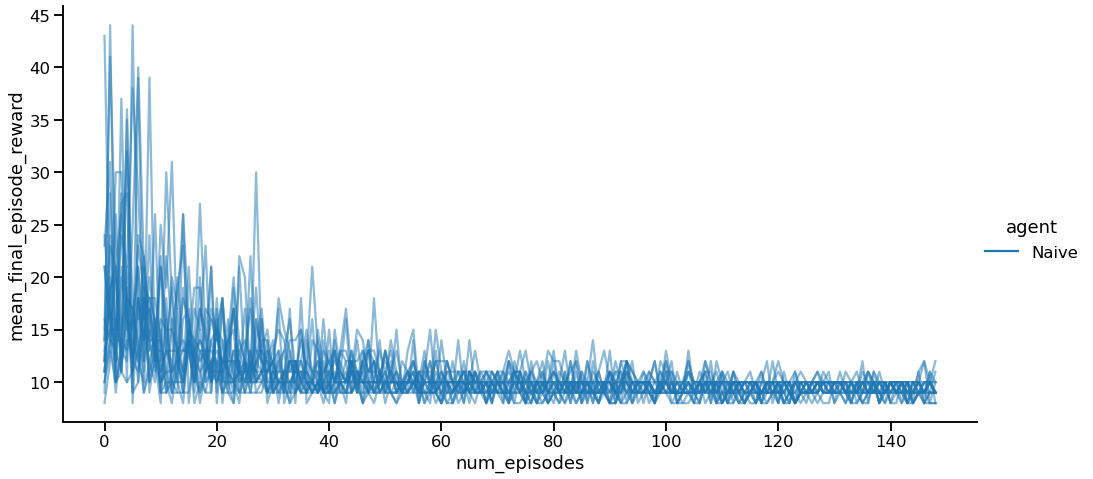

In [20]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=naive_trains_result_df,
                height=7, aspect=2, alpha=0.5);

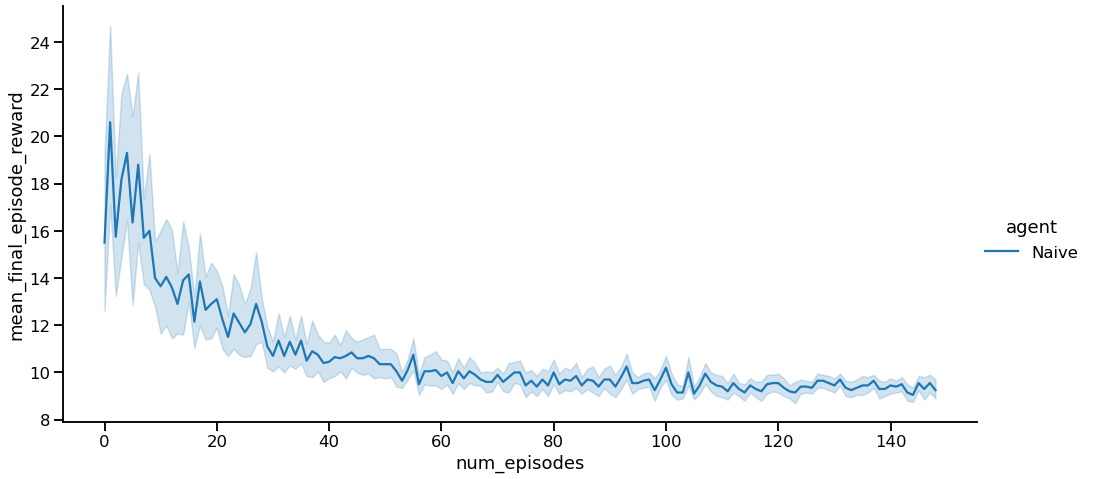

In [21]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", hue="agent", kind="line", data=naive_trains_result_df, height=7, aspect=2)

### Test it

Episode reward: 10.0
Episode reward: 11.0
Episode reward: 9.0
Episode reward: 10.0
Episode reward: 9.0


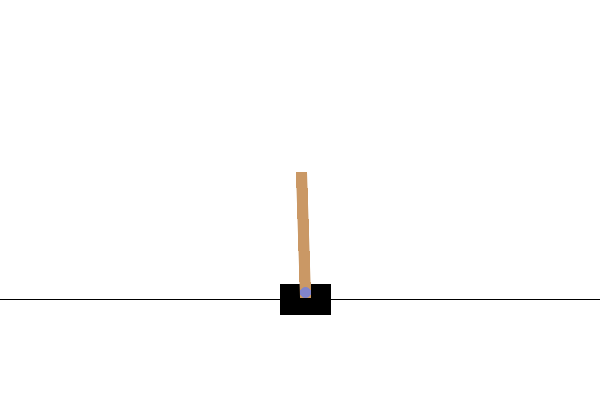

In [22]:
# q_network = torch.load("naive_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=5)

env.close()

env.render_wrapper.make_gif("lab1_naive_tained")

### Experimental results

**Task 2.5:** What do you observe? Why?

## Why It Doesn't Work: The Complexity of Deep Reinforcement Learning

Our initial deep value-based agent did not converge, primarily due to the three fundamental challenges of value-based deep reinforcement learning:

1. **Coverage**: Convergence to the optimal Q-function relies on comprehensive coverage of the state space. However, in the context of deep RL, the state space is often too large to be fully covered. In situations where not all states are sampled due to their vast number, the guarantee of convergence no longer holds.

2. **Correlation**: The probability of transitioning to the next state is highly influenced by the current state. This strong correlation can lead to local overfitting and the risk of becoming trapped in a local optimum: the neural network, which approximates the Q-function, may become overly specialized in a small portion of the action-state space and neglect the rest.

3. **Convergence**: The "targets" used as the truth to be achieved "move" during the learning process. For the same prediction (estimation of the value of a state-action pair, i.e., its Q-value), the loss of a given example changes during the learning process (due to *bootstrapping* a main concept of TD-Learning). In other words, DQN tries to minimize a moving target, a target that depends on the model we are learning and optimizing. This can lead to instability and make it difficult for the learning process to converge to an optimal policy.

In the following sections, we will explore strategies to address these challenges and improve the performance of our deep reinforcement learning agent.

## Part 3: Deep Q-Networks v1 (DQN version 2013)

In 2013, DeepMind made a significant contribution to the field of reinforcement learning with the publication of the paper "Playing Atari with Deep Reinforcement Learning" by Volodymyr Mnih and al (https://arxiv.org/abs/1312.5602). This paper marked the introduction of the first version of Deep Q-Networks (DQN).

The paper's primary innovation was the development of a technique to decorrelate states in reinforcement learning. This technique, known as *experience replay*, leverages a *replay buffer* to store and sample experiences. The introduction of experience replay greatly enhanced the stability and efficiency of the learning process.

### Experience replay

Experience replay is a key technique used in Deep Q-Networks (DQN) to address the issues of correlation.

In a typical reinforcement learning setup, an agent learns by interacting with the environment, receiving feedback in the form of rewards, and updating its policy based on this feedback. This process is inherently sequential and the successive states are highly correlated, which can lead to overfitting and instability in learning.

Experience replay addresses these issues by storing the agent's experiences, i.e., the tuples of (state, action, reward, next state), in a data structure known as a replay buffer. During the learning process, instead of learning from the most recent experience, the agent randomly samples a batch of experiences from the replay buffer. This random sampling breaks the correlation between successive experiences, leading to more stable and robust learning.

Also, by learning from past experiences, the agent can effectively learn from a fixed target, which mitigates the issue of learning from a moving target. This is because the experiences in the replay buffer remain fixed once they are stored, even though the agent's policy continues to evolve.

### DQN v2013 Algorithm

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br>
	$\quad\quad$ capacity of the experience replay memory $M$<br>
	$\quad\quad$ batch size $m$<br><br>

<b>Initialize</b> replay memory $\mathcal{D}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}$ with random weights $\mathbf{\omega}$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega}}$ $)$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ Store transition $(\mathbf{s}, \mathbf{a}, r, \mathbf{s'})$ in $\mathcal{D}$<br>
		$\quad\quad$ Sample random batch of transitions $(\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j)$ from $\mathcal{D}$<br>
		$\quad\quad$ Set $y_j = 
		\begin{cases} 
		r_j & \text{for terminal } \mathbf{s'}_j\\
		r_j + \gamma \max_{\mathbf{a}^\star}\hat{Q}_{\mathbf{\omega}}(\mathbf{s'}_j)_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}_j
		\end{cases}$<br>
		$\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega}$<br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega}$ <br>


### Exercise 3: Implement DQN with experience replay

#### Implement the Replay Buffer

To incorporate experience replay into the provided naive deep value-based reinforcement learning agent definition, we need to introduce a memory buffer where experiences are stored, and then update the algorithm to sample a random batch of experiences from this buffer to update the weights.

In [23]:
class ReplayBuffer:
    """
    A Replay Buffer.

    Attributes
    ----------
    buffer : collections.deque
        A double-ended queue where the transitions are stored.

    Methods
    -------
    add(state: np.ndarray, action: np.int64, reward: float, next_state: np.ndarray, done: bool)
        Add a new transition to the buffer.
    sample(batch_size: int) -> Tuple[np.ndarray, float, float, np.ndarray, bool]
        Sample a batch of transitions from the buffer.
    __len__()
        Return the current size of the buffer.
    """

    def __init__(self, capacity: int):
        """
        Initializes a ReplayBuffer instance.

        Parameters
        ----------
        capacity : int
            The maximum number of transitions that can be stored in the buffer.
        """
        self.buffer = collections.deque(maxlen=capacity)

    def add(self, state: np.ndarray, action: np.int64, reward: float, next_state: np.ndarray, done: bool):
        """
        Add a new transition to the buffer.

        Parameters
        ----------
        state : np.ndarray
            The state vector of the added transition.
        action : np.int64
            The action of the added transition.
        reward : float
            The reward of the added transition.
        next_state : np.ndarray
            The next state vector of the added transition.
        done : bool
            The final state of the added transition.
        """
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size: int) -> Tuple[np.ndarray, float, float, np.ndarray, bool]:
        """
        Sample a batch of transitions from the buffer.

        Parameters
        ----------
        batch_size : int
            The number of transitions to sample.

        Returns
        -------
        Tuple[np.ndarray, float, float, np.ndarray, bool]
            A batch of `batch_size` transitions.
        """
        # Here, `random.sample(self.buffer, batch_size)`
        # returns a list of tuples `(state, action, reward, next_state, done)`
        # where:
        # - `state`  and `next_state` are numpy arrays
        # - `action` and `reward` are floats
        # - `done` is a boolean
        #
        # `states, actions, rewards, next_states, dones = zip(*random.sample(self.buffer, batch_size))`
        # generates 5 tuples `state`, `action`, `reward`, `next_state` and `done`, each having `batch_size` elements.
        states, actions, rewards, next_states, dones = zip(*random.sample(self.buffer, batch_size))
        return np.array(states), actions, rewards, np.array(next_states), dones

    def __len__(self):
        """
        Return the current size of the buffer.

        Returns
        -------
        int
            The current size of the buffer.
        """
        return len(self.buffer)

#### Implement the training function

The training function of our initial deep value-based agent needs to be modified to incorporate the use of the replay buffer effectively.

1. **Store Experiences**: After the agent takes an action and receives a reward and the next state from the environment, store this experience in the replay buffer.

2. **Sample Experiences**: Instead of using the most recent experience to update the agent's policy, randomly sample a batch of experiences from the replay buffer.

3. **Compute Loss and Update Weights**: Use the sampled experiences to compute the loss and update the weights of the Q-Network.

4. **Handle Terminal States**: If the 'done' flag of an experience is True, indicating a terminal state, make sure to adjust the target Q-value to be just the received reward. This is because there are no future rewards possible after a terminal state.

**Task 3.1:** complete the `train_dqn1_agent` to use the replay buffer.

In [24]:
def train_dqn1_agent(env: gym.Env,
                     q_network: torch.nn.Module,
                     optimizer: torch.optim.Optimizer,
                     loss_fn: Callable,
                     epsilon_greedy: EpsilonGreedy,
                     device: torch.device,
                     lr_scheduler: _LRScheduler,
                     num_episodes: int,
                     gamma: float,
                     batch_size: int,
                     replay_buffer: ReplayBuffer) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # Get action, next_state and reward

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # Update the q_network weights with a batch of experiences from the buffer

            if len(replay_buffer) > batch_size:

                ### BEGIN SOLUTION ###
                state1_batch, action_batch, reward_batch, state2_batch, done_batch = replay_buffer.sample(batch_size)

                 # Convert to Pytorch tensors
                batch_states_tensor = torch.tensor(state1_batch, dtype = torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(state2_batch, dtype = torch.float32, device=device)
                batch_rewards_tensor = torch.tensor(reward_batch, dtype = torch.float32, device=device)
                batch_actions_tensor = torch.tensor(action_batch, dtype = torch.int64, device=device)
                batch_dones_tensor = torch.tensor(done_batch, dtype = torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    next_state_q_values, best_actions_index = q_network(batch_next_states_tensor).max(dim=1)

                    targets = batch_rewards_tensor + gamma*next_state_q_values*(1 - batch_dones_tensor)

                # Compute the q-values of the current state, and we pick only the action we indeed played to go from state to next_state (stored in ther action_batch)
                current_q_values = q_network(batch_states_tensor).gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)

                ### END SOLUTION ###

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

### Train it

In [26]:
env = gym.make('CartPole-v1')

num_trains = 4
dqn1_trains_result_list = [[], [], []]

for train_index in range(num_trains):

    # Instantiate required objects
    
    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()
    
    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)
    
    replay_buffer = ReplayBuffer(2000)
    
    # Train the q-network

    episode_reward_list = train_dqn1_agent(env,
                                           q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer)
    dqn1_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn1_trains_result_list[1].extend(episode_reward_list)
    dqn1_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn1_trains_result_df = pd.DataFrame(np.array(dqn1_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
dqn1_trains_result_df["agent"] = "DQN 2013"

# Save the action-value estimation function

torch.save(q_network, "dqn1_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

### Plot results

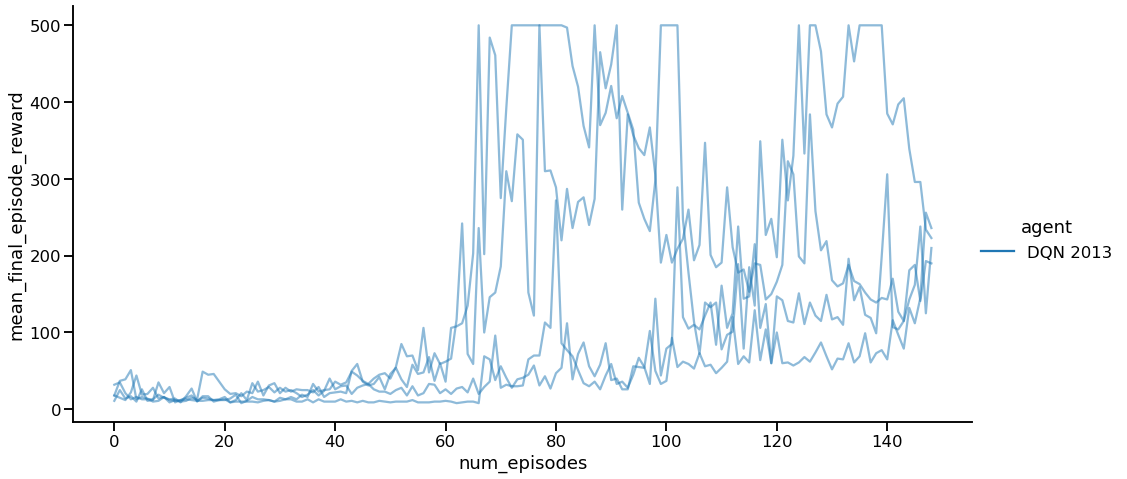

In [27]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=dqn1_trains_result_df,
                height=7, aspect=2, alpha=0.5);

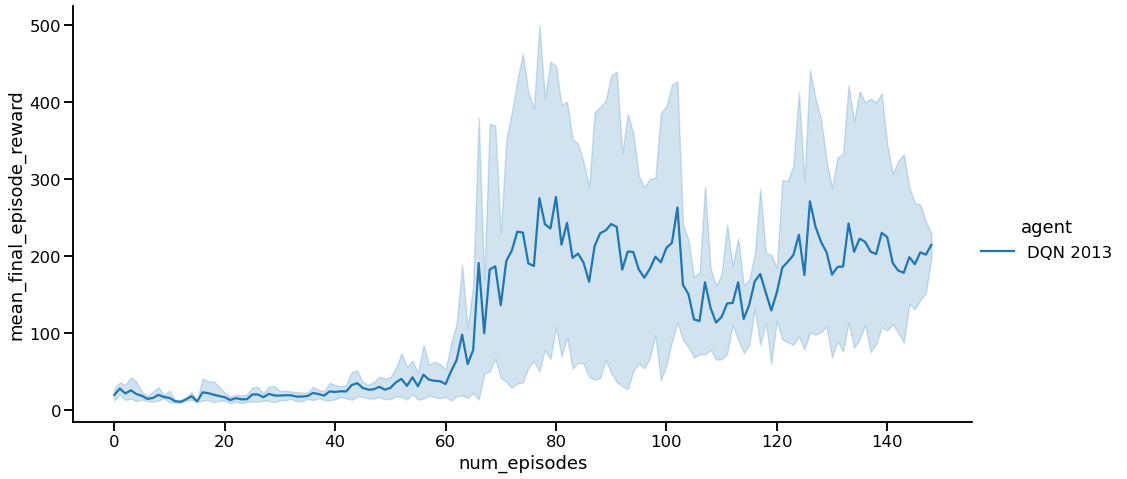

In [28]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn1_trains_result_df, height=7, aspect=2)

In [29]:
# all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df])
# g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

### Test it

Episode reward: 171.0
Episode reward: 308.0
Episode reward: 268.0


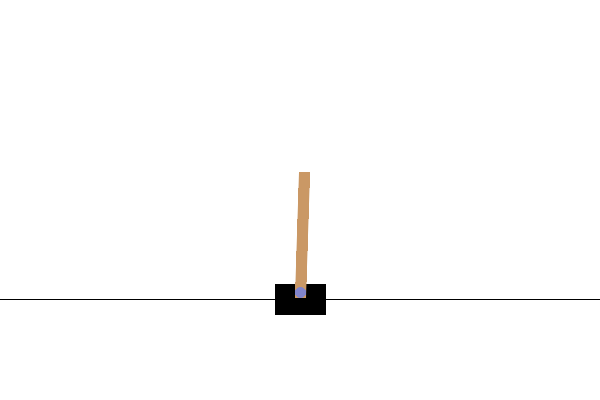

In [30]:
# q_network = torch.load("dqn1_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif("lab1_dqn1_tained")

### Experimental results

**Task 3.2:** What do you observe? Why?

## Part 4: Deep Q-Networks v2 (DQN version 2015)

In 2015, DeepMind further advanced the field of reinforcement learning with the publication of the paper "Human-level control through deep reinforcement learning" by Volodymyr Mnih and colleagues (https://www.nature.com/articles/nature14236). This work introduced the second version of Deep Q-Networks (DQN).

<img src="8821ef05424dc69e90ae575d439c09a2--nature-journal-space-invaders.jpg" width="200px" />

The key contribution of this paper was the introduction of a method to stabilize the learning process by infrequently updating the target weights. This technique, known as *infrequent updates of target weights*, significantly improved the stability of the learning process.

### Infrequent weight updates

Infrequent weight updates, also known as the use of a target network, is a technique used in Deep Q-Networks (DQN) to address the issue of learning from a moving target.

In a typical DQN setup, there are two neural networks: the Q-network and the target network. The Q-network is used to predict the Q-values and is updated at every time step. The target network is used to compute the target Q-values for the update, and its weights are updated less frequently, typically every few thousand steps, by copying the weights from the Q-network.

The idea behind infrequent weight updates is to stabilize the learning process by keeping the target Q-values fixed for a number of steps. This mitigates the issue of learning from a moving target, as the target Q-values remain fixed between updates.

Without infrequent weight updates, both the predicted and target Q-values would change at every step, which could lead to oscillations and divergence in the learning process. By introducing a delay between updates of the target Q-values, the risk of such oscillations is reduced.

### DQN v2015 Algorithm

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br>
	$\quad\quad$ capacity of the experience replay memory $M$<br>
	$\quad\quad$ batch size $m$<br>
	$\quad\quad$ target network update frequency $\tau$<br><br>

<b>Initialize</b> replay memory $\mathcal{D}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}$ with random weights $\mathbf{\omega}$<br>
<b>Initialize</b> target action-value function $\hat{Q}$ with weights $\mathbf{\omega_2} = \mathbf{\omega}$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega_1}}$ $)$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ Store transition $(\mathbf{s}, \mathbf{a}, r, \mathbf{s'})$ in $\mathcal{D}$<br>
		$\quad\quad$ Sample random batch of transitions $(\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j)$ from $\mathcal{D}$<br>
		$\quad\quad$ For each $j$, set $y_j = 
		\begin{cases} 
		r_j & \text{for terminal } \mathbf{s'}_j\\
		r_j + \gamma \max_{\mathbf{a}^\star} \hat{Q}_{\mathbf{\omega_2}} (\mathbf{s'}_j)_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}_j
		\end{cases}$<br>
		$\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega_1}$<br>
		$\quad\quad$ Every $\tau$ steps reset $\hat{Q}_{\mathbf{\omega_2}}$ to $\hat{Q}_{\mathbf{\omega_1}}$, i.e., set $\mathbf{\omega_2} \leftarrow \mathbf{\omega_1}$<br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega}$ <br>


### Exercise 4: Implement DQN v2015 with *infrequent weight updates*

#### Implement the training function

To incorporate the use of infrequent weight updates in the training function, you would need to make the following modifications:

1. **Update the Target Network Infrequently**: Instead of updating the weights of the target network at every time step, update them less frequently, for example, every few thousand steps. The weights of the target network are updated by copying the weights from the Q-network.

2. **Compute Target Q-values with the Target Network**: When computing the target Q-values for the update, use the target network instead of the Q-network. This ensures that the target Q-values remain fixed between updates, which stabilizes the learning process.

**Task 4.1:** complete the `train_dqn2_agent` to apply infrequent weight updates.

In [31]:
def train_dqn2_agent(env: gym.Env,
                     q_network: torch.nn.Module,
                     target_q_network: torch.nn.Module,
                     optimizer: torch.optim.Optimizer,
                     loss_fn: Callable,
                     epsilon_greedy: EpsilonGreedy,
                     device: torch.device,
                     lr_scheduler: _LRScheduler,
                     num_episodes: int,
                     gamma: float,
                     batch_size: int,
                     replay_buffer: ReplayBuffer,
                     target_q_network_sync_period: int) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # Get action, next_state and reward

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # Update the q_network weights with a batch of experiences from the buffer

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                ### BEGIN SOLUTION ###
                # Compute the target Q values for the batch
                with torch.no_grad():
                    next_state_q_values, best_actions_index = target_q_network(batch_next_states_tensor).max(dim=1)

                    targets = batch_rewards_tensor + gamma*next_state_q_values*(1 - batch_dones_tensor)

                # Compute the q-values of the current state, and we pick only the action we indeed played to go from state to next_state (stored in ther action_batch)
                current_q_values = q_network(batch_states_tensor).gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)
                

                ### END SOLUTION ###

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            # Update the target q-network

            # Every few training steps (e.g., every 100 steps), the weights of the target network are updated with the weights of the Q-network

            ### BEGIN SOLUTION ###

            if(episode_index%target_q_network_sync_period==0):
                
                target_q_network.load_state_dict(q_network.state_dict())

            ### END SOLUTION ###

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

### Train it

In order to test this new implementation, we needs de adapt the following cell to instantiate and initialize the two neural networks.

**Task 4.2:** complete the following cell to make the two Q-Networks. Initialize a target network that has the same architecture as the Q-network. The weights of the target network are initially copied from the Q-network.

In [38]:
env = gym.make('CartPole-v1')

num_trains = 10
dqn2_trains_result_list = [[], [], []]

for train_index in range(num_trains):

    # Instantiate required objects

    ### BEGIN SOLUTION ###

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network =  q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network.load_state_dict(q_network.state_dict())

    ### END SOLUTION ###

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list = train_dqn2_agent(env,
                                           q_network,
                                           target_q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer,
                                           target_q_network_sync_period=30)
    dqn2_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn2_trains_result_list[1].extend(episode_reward_list)
    dqn2_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn2_trains_result_df = pd.DataFrame(np.array(dqn2_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
dqn2_trains_result_df["agent"] = "DQN 2015"

# Save the action-value estimation function

torch.save(q_network, "dqn2_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

In [56]:
dqn2_trains_result_df.head()

num_episodes  mean_final_episode_reward  training_index     agent
0           0.0                       22.0             0.0  DQN 2015
1           1.0                       15.0             0.0  DQN 2015
2           2.0                        9.0             0.0  DQN 2015
3           3.0                       26.0             0.0  DQN 2015
4           4.0                       16.0             0.0  DQN 2015

### Plot results

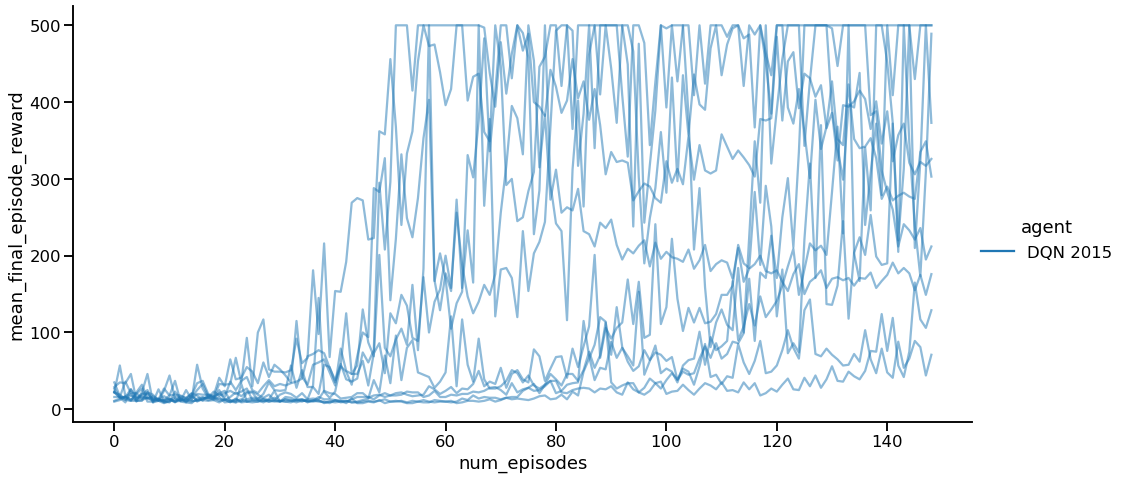

In [39]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=dqn2_trains_result_df,
                height=7, aspect=2, alpha=0.5);

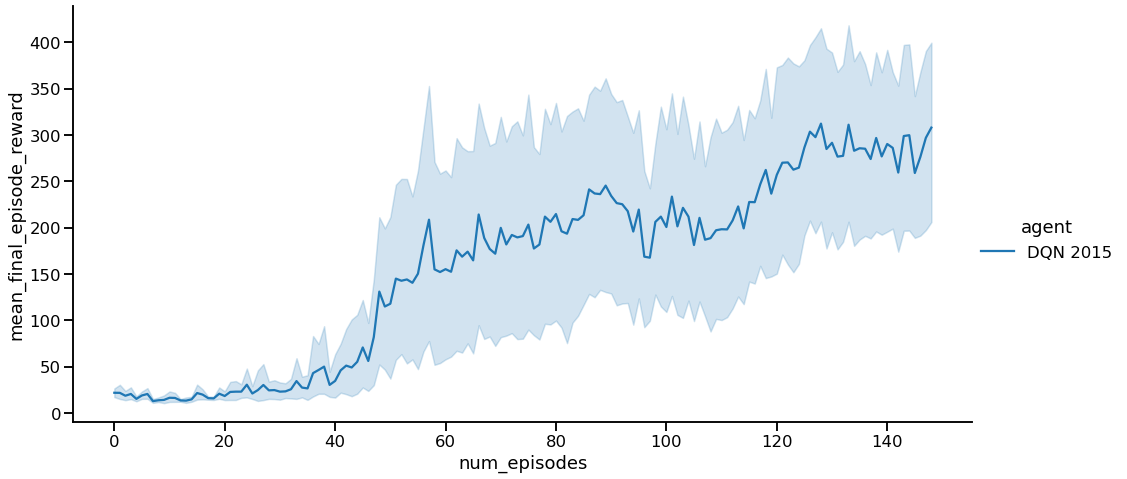

In [40]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn2_trains_result_df, height=7, aspect=2)

In [41]:
# all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df, dqn2_trains_result_df])
# g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

### Test it

Episode reward: 422.0
Episode reward: 277.0
Episode reward: 313.0


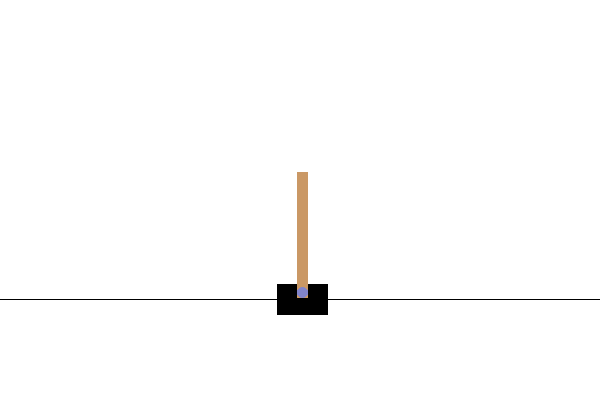

In [42]:
# q_network = torch.load("dqn2_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif("lab1_dqn2_tained")

### Experimental results

**Task 4.3:** What do you observe? Why? 

It is far mor stable and provide better results

## Part 5: Double Deep Q-Network (DDQN)

Hado Van Hasselt et al. introduced Double Deep Q-Networks in the publication "Deep reinforcement learning with Double Q-Learning" in 2016 (https://arxiv.org/abs/1509.06461).

Double Deep Q-Networks (DDQN) is an enhancement over the standard Deep Q-Network (DQN). It was designed to reduce the overestimation of action values that can occur in DQN. The fundamental concept behind DDQN is the separation of action selection from their evaluation to reduce the overestimation of action values in DQN.

### DDQN Algorithm

<b>Input</b>:<br>
    $\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
    $\quad\quad$ discount factor $\gamma$<br>
    $\quad\quad$ step size $\alpha \in (0,1]$<br>
    $\quad\quad$ small $\epsilon > 0$<br>
    $\quad\quad$ capacity of the experience replay memory $M$<br>
    $\quad\quad$ batch size $m$<br>
    $\quad\quad$ target network update frequency $\tau$<br><br>

<b>Initialize</b> replay memory $\mathcal{D}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}$ with random weights $\mathbf{\omega_1}$<br>
<b>Initialize</b> target action-value function $\hat{Q}$ with weights $\mathbf{\omega_2} = \mathbf{\omega_1}$<br><br>

<b>FOR EACH</b> episode<br>
    $\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
    $\quad$ <b>DO</b> <br>
        $\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega_1}})$<br>
        $\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
        $\quad\quad$ Store transition $(\mathbf{s}, \mathbf{a}, r, \mathbf{s'})$ in $\mathcal{D}$<br>
        $\quad\quad$ Sample random batch of transitions $(\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j)$ from $\mathcal{D}$<br>
        $\quad\quad$ For each $j$, set $\textcolor{red}{\mathbf{a}^\star = \arg\max_{\mathbf{a}} \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s'}_j)_{\mathbf{a}}}$<br>
        $\quad\quad$ Set $y_j = 
        \begin{cases} 
        r_j & \text{for terminal } \mathbf{s'}_j\\
        r_j + \gamma \hat{Q}_{\mathbf{\omega_2}}(\mathbf{s'}_j)_{\textcolor{red}{\mathbf{a}^\star}} & \text{for non-terminal } \mathbf{s'}_j
        \end{cases}$<br>
        $\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega_1}$<br>
        $\quad\quad$ Every $\tau$ steps reset $\hat{Q}_{\mathbf{\omega_2}}$ to $\hat{Q}_{\mathbf{\omega_1}}$, i.e., set $\mathbf{\omega_2} \leftarrow \mathbf{\omega_1}$<br>
        $\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
    $\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega_1}$ <br>


### Exercise 5: Implement DDQN

#### Implement the training function

Switching from a Deep Q-Network (DQN) to a Double Deep Q-Network (DDQN) involves a key modification in the way the Q-value update is performed during training. 

In DQN, the Q-value update is done using the maximum Q-value for the next state from the target network. However, this can lead to an overestimation of Q-values because it always uses the maximum estimate.

DDQN addresses this by decoupling the selection of the action from the evaluation of that action. In DDQN, the Q-network is used to select what the next action is, and the target network is used to evaluate the Q-value of taking that action at the next state.

**Task 4.2:** complete the `train_ddqn_agent` function.

In [59]:
def train_ddqn_agent(env: gym.Env,
                     q_network: torch.nn.Module,
                     target_q_network: torch.nn.Module,
                     optimizer: torch.optim.Optimizer,
                     loss_fn: Callable,
                     epsilon_greedy: EpsilonGreedy,
                     device: torch.device,
                     lr_scheduler: _LRScheduler,
                     num_episodes: int,
                     gamma: float,
                     batch_size: int,
                     replay_buffer: ReplayBuffer,
                     target_q_network_sync_period: int, 
                     gradient_clipping = False,
                     clip_grad_value = 0.57,
                     clip_info=False) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []
    max_gradient_values = []

    for episode_index in tqdm(range(1, num_episodes)):

        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # GET ACTION, NEXT_STATE AND REWARD ###########

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # UPDATE THE Q_NETWORK WEIGHTS WITH A BATCH OF EXPERIENCES FROM THE BUFFER

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():

                    ### BEGIN SOLUTION ###

                    # First, select the best action using the online network (q_network)
                    q_values, best_actions = q_network(batch_next_states_tensor).max(dim=1)

                    # Then, use the target network (target_q_network) to get the Q-value for these actions
                        # We use our target q-network to get the possible actions for our next_state, and select the one corresponding to the best_actions
                    next_state_q_values = target_q_network(batch_next_states_tensor).gather(dim=1, index=best_actions.unsqueeze(-1)).squeeze(-1)

                    # The targets for the batch are the rewards plus the discounted maximum Q-values obtained from the next states.
                    targets = batch_rewards_tensor + gamma*next_state_q_values*(1 - batch_dones_tensor)

                    ### END SOLUTION ###

                # Compute the current Q values for the batch.
                # 
                # The expression `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)` is used to select specific elements from the tensor of Q-values returned by the Q-network.
                # 
                # Here's a breakdown of the following line of code:
                # - `q_network(batch_states_tensor)`:
                #   This is passing a batch of states through the Q-network.
                #   For each state, this outputs the Q-value for each possible action.
                #   Thus, `q_network(batch_states_tensor)` returns a tensor of shape (batch_size, action_dim).
                # 
                # - `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1))`:
                #   This is selecting the Q-values corresponding to the actions that were actually taken.
                #   The `gather` function is used to select elements from a tensor using an index.
                #   In this case, the index is `batch_actions_tensor.unsqueeze(-1)`, which is a tensor of the actions that were taken.
                #   The `unsqueeze(-1)` function is used to add an extra dimension to the tensor, which is necessary for the `gather` function.
                # 
                # - `squeeze(-1)`:
                #   This is removing the extra dimension that was added by `unsqueeze(-1)`.
                #   The `squeeze` function is used to remove dimensions of size 1 from a tensor.
                #
                # So, the entire expression is selecting the Q-values of the actions that were actually taken from the tensor of all Q-values,
                # and returning a tensor of these selected Q-values.
                current_q_values = q_network(batch_states_tensor).gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()

                if(gradient_clipping): # Bonus question at the end of the lab
                    torch.nn.utils.clip_grad_value_(q_network.parameters(), clip_grad_value)  # In-place gradient clipping
                optimizer.step()

                lr_scheduler.step()

            # UPDATE THE TARGET Q-NETWORK #################

            # Every few training steps (e.g., every 100 steps), the weights of the target network are updated with the weights of the Q-network

            if iteration % target_q_network_sync_period == 0:
                
                if(clip_info):
                    max_gradient_value = 0.0  # Initialize to a minimum value
                    for param in q_network.parameters():
                        if param.grad is not None:
                            max_gradient_value = max(max_gradient_value, param.grad.abs().max().item())
                    max_gradient_values.append(max_gradient_value)
                
                target_q_network.load_state_dict(q_network.state_dict())

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list, max_gradient_values

### Train it

In [62]:
env = gym.make('CartPole-v1')

num_trains = 10
ddqn_trains_result_list = [[], [], []]

for train_index in range(num_trains):

    # Instantiate required objects

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device) # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network.load_state_dict(q_network.state_dict()) # Initialize the target Q-network with the same weights as the Q-network

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list, _ = train_ddqn_agent(env,
                                           q_network,
                                           target_q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer,
                                           target_q_network_sync_period=30)

    ddqn_trains_result_list[0].extend(range(len(episode_reward_list)))
    ddqn_trains_result_list[1].extend(episode_reward_list)

    ddqn_trains_result_list[2].extend([train_index for _ in episode_reward_list])

ddqn_trains_result_df = pd.DataFrame(np.array(ddqn_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
ddqn_trains_result_df["agent"] = "DDQN"

# SAVE THE ACTION-VALUE ESTIMATION FUNCTION

torch.save(q_network, "ddqn_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

### Plot results

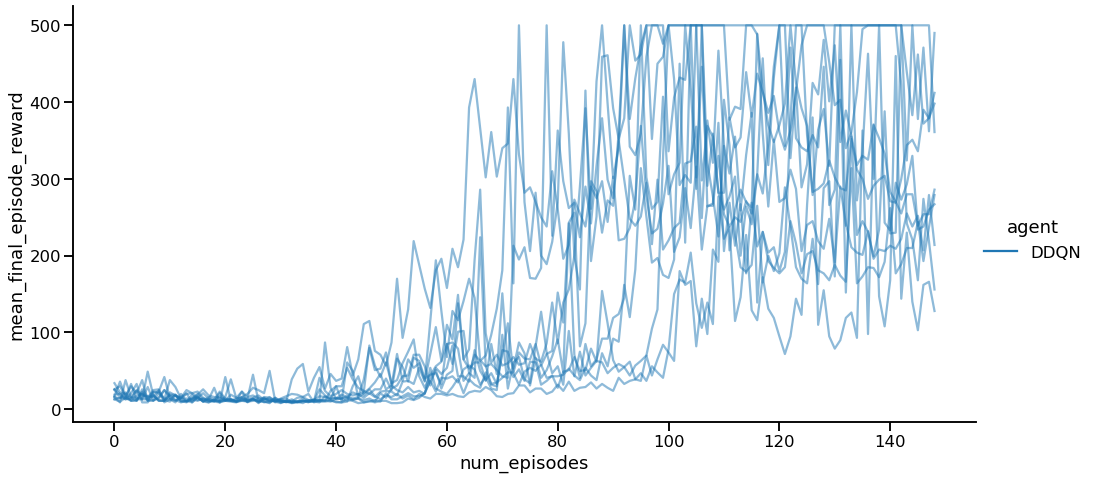

In [66]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=ddqn_trains_result_df,
                height=7, aspect=2, alpha=0.5);

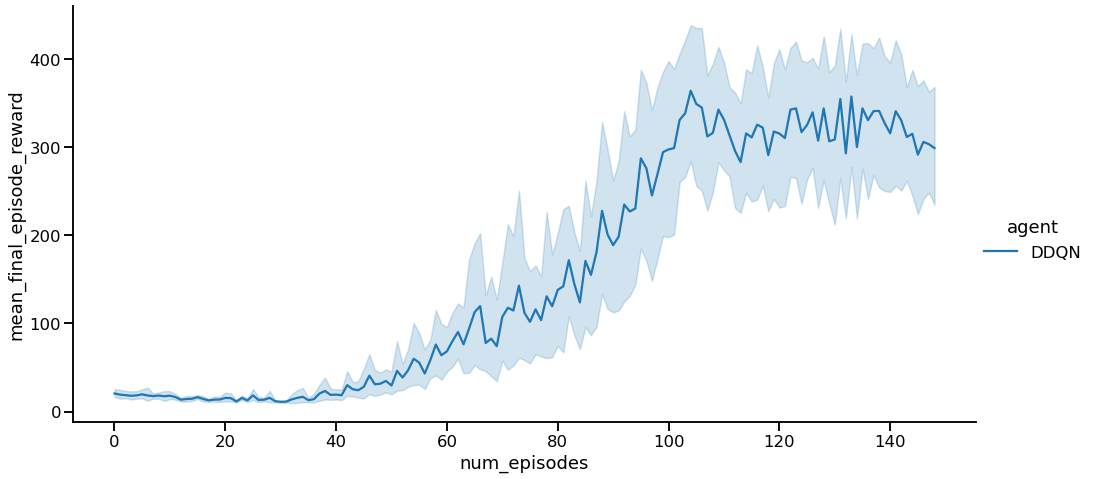

In [67]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=ddqn_trains_result_df, height=7, aspect=2)

In [68]:
# all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df, dqn2_trains_result_df, ddqn_trains_result_df])
# g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=all_trains_result_df, height=7, aspect=2)

### Test it

Episode reward: 329.0
Episode reward: 201.0
Episode reward: 191.0


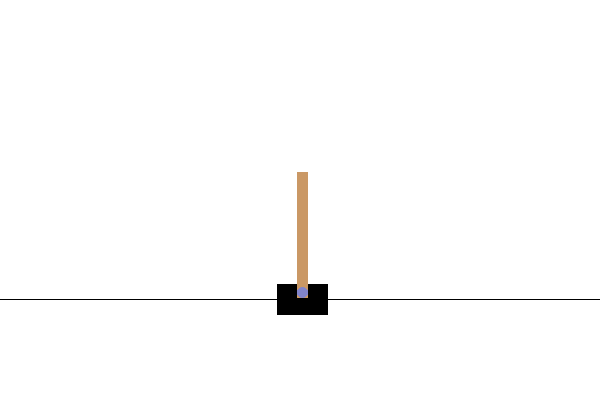

In [69]:
# q_network = torch.load("ddqn_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif("lab1_ddqn_tained")

### Experimental results

**Task 5.2:** What do you observe? Why?

## Part 6: Prioritized Experience Replay (PEX or PER)

Prioritized Experience Replay (PER) is an enhancement to the traditional experience replay mechanism used in Deep Q-Networks (DQNs) and other reinforcement learning algorithms. In traditional experience replay, experiences (or transitions) are stored in a replay buffer, and mini-batches are sampled uniformly at random from this buffer to update the agent's Q-network. This means every experience has the same probability of being chosen, regardless of its significance to the learning process.

Prioritized Experience Replay (PER) is a technique that modifies the standard experience replay by more frequently replaying experiences that have a high expected learning progress, as measured by their temporal-difference (TD) error.

Prioritized Experience Replay was introduced by Tom Schaul et al. in the paper "Prioritised experience replay" in 2016 (https://arxiv.org/abs/1511.05952).

### DQN with PER algorithm

<b>Input</b>:<br>
    $\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
    $\quad\quad$ discount factor $\gamma$<br>
    $\quad\quad$ step size $\alpha \in (0,1]$<br>
    $\quad\quad$ small $\epsilon > 0$<br>
    $\quad\quad$ capacity of the experience replay memory $M$<br>
    $\quad\quad$ batch size $m$<br>
    $\quad\quad$ target network update frequency $\tau$<br>
    $\quad\quad$ prioritization exponent $\eta$<br><br>

<b>Initialize</b> replay memory $\mathcal{D}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}$ with random weights $\mathbf{\omega_1}$<br>
<b>Initialize</b> target action-value function $\hat{Q}$ with weights $\mathbf{\omega_2} = \mathbf{\omega_1}$<br><br>

<b>FOR EACH</b> episode<br>
    $\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
    $\quad$ <b>DO</b> <br>
        $\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega_1}})$<br>
        $\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
        $\quad\quad$ Compute priority $\textcolor{red}{p = \left| r + \gamma \max_{\mathbf{a}^\star} \hat{Q}_{\mathbf{\omega_2}} (\mathbf{s'})_{\mathbf{a}^\star} - \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s})_{\mathbf{a}} \right|^\eta}$<br>
        $\quad\quad$ Store transition $(\mathbf{s}, \mathbf{a}, r, \mathbf{s'}, p)$ in $\mathcal{D}$<br>
        $\quad\quad$ Sample random batch of transitions $(\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j, \textcolor{red}{p_j})$ from $\mathcal{D}$ with probability proportional to $\textcolor{red}{p_j}$<br>
        $\quad\quad$ For each $j$, set $y_j = 
        \begin{cases} 
        r_j & \text{for terminal } \mathbf{s'}_j\\
        r_j + \gamma \max_{\mathbf{a}^\star} \hat{Q}_{\mathbf{\omega_2}} (\mathbf{s'}_j)_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}_j
        \end{cases}$<br>
        $\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega_1}$<br>
        $\quad\quad$ Update priorities $p_j$ in $\mathcal{D}$ for each sampled transition<br>
        $\quad\quad$ Every $\tau$ steps reset $\hat{Q}_{\mathbf{\omega_2}}$ to $\hat{Q}_{\mathbf{\omega_1}}$, i.e., set $\mathbf{\omega_2} \leftarrow \mathbf{\omega_1}$<br>
        $\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
    $\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega_1}$ <br>


### Exercise 6: Implement DQN with PER

To switch from a DQN to a DQN with Prioritized Experience Replay (PER), you need to make a few modifications to the *DQN 2015* agent:

1. **Experience Replay Buffer**: Replace the standard experience replay buffer with a prioritized one. This buffer should store experiences with a priority value that is updated after each learning step. The priority value is usually the absolute TD error plus a small constant to avoid experiences having zero probability of being chosen.
2. **Sampling Method**: Change the sampling method from uniform to prioritized sampling. This means experiences with higher priority values have a higher probability of being chosen for learning.
3. **Loss Function**: Modify the loss function to include importance sampling weights. These weights compensate for the bias introduced by the non-uniform sampling. The weight of each sampled experience is the inverse of its probability of being chosen.



#### Implement the PrioritizedReplayBuffer

**Task 6.1:** implement the `PrioritizedReplayBuffer` class.

In [77]:
class PrioritizedReplayBuffer:
    """
    Implements a Prioritized Experience Replay buffer as described in the paper
    "Prioritized Experience Replay" (https://arxiv.org/abs/1511.05952).

    Attributes
    ----------
    buffer : Deque[Tuple[float, float, float, float, float]]
        The replay buffer storing the experiences.
    priorities : Deque[float]
        The priorities of the experiences in the buffer.
    """

    def __init__(self, capacity: int):
        """
        Initialize the replay buffer.

        Parameters
        ----------
        capacity : int
            The maximum number of experiences the buffer can hold.
        """
        self.buffer = collections.deque(maxlen=capacity)
        self.priorities = collections.deque(maxlen=capacity)

    def add(self, state: float, action: float, reward: float, next_state: float, done: float):
        """
        Add an experience to the buffer.

        Parameters
        ----------
        state : float
            The current state.
        action : float
            The action taken.
        reward : float
            The reward received.
        next_state : float
            The next state.
        done : float
            Whether the episode has ended.
        """
        self.buffer.append((state, action, reward, next_state, done))
        self.priorities.append(max(self.priorities, default=1))

    def sample(self, batch_size: int, alpha: float = 0.6, beta: float = 0.4) -> Tuple[List[Tuple], np.ndarray, np.ndarray]:
        """
        Sample a batch of experiences from the buffer.

        Parameters
        ----------
        batch_size : int
            The number of experiences to sample.
        alpha : float, optional
            The exponent that determines how much prioritization is used.
        beta : float, optional
            The exponent that determines how much importance sampling is used.

        Returns
        -------
        Tuple[List[Tuple[float, float, float, float, float]], np.ndarray, np.ndarray]
            The sampled experiences, the indices of the sampled experiences, and the importance sampling weights.
        """
        
        ### BEGIN SOLUTION ###

        # Calculate priorities
        priorities = self.priorities / np.sum(self.priorities) # Normalizing to TD errors to get probabilities, no eta exponent

        # Sample experiences
        indices = np.argsort(priorities)[:batch_size] # Get the most prioritized experiences
        experiences = [self.buffer[ind] for ind in indices] # Get only the sampled experiences

        # Calculate weights
        weights = (1/batch_size*(priorities**alpha))**beta
        weights /= np.max(weights)

        ### END SOLUTION ###

        return experiences, indices, weights

    def update_priorities(self, indices: np.ndarray, errors: List[float], offset: float = 0.1):
        """
        Update the priorities of the sampled experiences.

        Parameters
        ----------
        indices : np.ndarray
            The indices of the sampled experiences.
        errors : List[float]
            The new TD errors for the sampled experiences.
        offset : float, optional
            A small constant to ensure the priorities are strictly positive.
        """
        for i, error in zip(indices, errors):
            self.priorities[i] = error + offset

    def __len__(self) -> int:
        """
        Return the current size of the buffer.

        Returns
        -------
        int
            The current size of the buffer.
        """
        return len(self.buffer)

#### Implement the training function

**Task 6.2:** complete the `train_dqn_per_agent` function.

In [108]:
def train_dqn_per_agent(env: gym.Env,
                        q_network: torch.nn.Module,
                        target_q_network: torch.nn.Module,
                        optimizer: torch.optim.Optimizer,
                        loss_fn: Callable,
                        epsilon_greedy: EpsilonGreedy,
                        device: torch.device,
                        lr_scheduler: _LRScheduler,
                        num_episodes: int,
                        gamma: float,
                        batch_size: int,
                        replay_buffer: PrioritizedReplayBuffer,  # Use a Prioritized Replay Buffer
                        target_q_network_sync_period: int,
                        alpha: float = 0.6,  # Alpha parameter for PER
                        beta: float = 0.4):  # Beta parameter for PER
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler._LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : PrioritizedReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.
    alpha : float
        The exponent that determines how much prioritization is used when sampling from the replay buffer.
    beta : float
        The exponent that determines how much importance sampling is used to adjust the loss function.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0

        for t in itertools.count():

            # GET ACTION, NEXT_STATE AND REWARD ###########

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, reward, next_state, done)

            episode_reward += reward

            # UPDATE THE Q_NETWORK WEIGHTS WITH A BATCH OF EXPERIENCES FROM THE BUFFER

            if len(replay_buffer) > batch_size:
                # Sample experiences and importance-sampling weights from the buffer

                ### BEGIN SOLUTION ###

                samples, indices, weights = replay_buffer.sample(batch_size)

                batch_states =  np.array([samples[i][0] for i in range(batch_size)])
                batch_actions = np.array([samples[i][1] for i in range(batch_size)])
                batch_rewards = np.array([samples[i][2] for i in range(batch_size)])
                batch_next_states = np.array([samples[i][3] for i in range(batch_size)])
                batch_dones = np.array([samples[i][4] for i in range(batch_size)])
                
                ### END SOLUTION ###

                # Convert to PyTorch tensors
  
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)
                weights_tensor = torch.tensor(weights, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    # Here's a breakdown of the next line of code:
                    # - `q_network(batch_next_states_t)`:
                    #   This is passing a batch of "next states" through the Q-network.
                    #   This outputs the Q-value for each possible action, a tensor of shape (batch_size, action_dim).
                    #
                    #  - `.max(dim=1)`:
                    #   This is finding the maximum Q-value for each state in the batch.
                    #   The dim=1 argument specifies that the maximum should be taken over the action dimension.
                    #
                    # The max() function in PyTorch returns a tuple containing two tensors: the maximum values and the indices where these maximum values were found.
                    # In the next lines of code, we will just use the first tensor (the maximum values) and ignoring the second tensor (the indices).
                    next_state_q_values, best_action_index = target_q_network(batch_next_states_tensor).max(dim=1)

                    # The targets for the batch are the rewards plus the discounted maximum Q-values obtained from the next states.
                    # The expression `(1 - batch_dones_tensor)` is used to handle the end of episodes.
                    # The `batch_dones_tensor` indicates whether each state in the batch is a terminal state (i.e., the end of an episode).
                    # If a state is a terminal state, the corresponding value in `batch_dones_tensor` is 1, otherwise it's 0.
                    # The Q-value of a terminal state is defined to be 0. Therefore, when calculating the target Q-values,
                    # we don't want to include the Q-value of the next state if the current state is a terminal state.
                    # This is achieved by multiplying `next_state_q_values` by `(1 - batch_dones_tensor)`.
                    # If the state is a terminal state, this expression becomes 0 and the Q-value of the next state is effectively ignored.
                    # If the state is not a terminal state, this expression is 1 and the Q-value of the next state is included in the calculation.
                    targets = batch_rewards_tensor + gamma * next_state_q_values * (1 - batch_dones_tensor)

                # Compute the current Q values for the batch.
                # 
                # The expression `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)` is used to select specific elements from the tensor of Q-values returned by the Q-network.
                # 
                # Here's a breakdown of the following line of code:
                # - `q_network(batch_states_tensor)`:
                #   This is passing a batch of states through the Q-network.
                #   For each state, this outputs the Q-value for each possible action.
                #   Thus, `q_network(batch_states_tensor)` returns a tensor of shape (batch_size, action_dim).
                # 
                # - `gather(dim=1, index=batch_actions_tensor.unsqueeze(-1))`:
                #   This is selecting the Q-values corresponding to the actions that were actually taken.
                #   The `gather` function is used to select elements from a tensor using an index.
                #   In this case, the index is `batch_actions_tensor.unsqueeze(-1)`, which is a tensor of the actions that were taken.
                #   The `unsqueeze(-1)` function is used to add an extra dimension to the tensor, which is necessary for the `gather` function.
                # 
                # - `squeeze(-1)`:
                #   This is removing the extra dimension that was added by `unsqueeze(-1)`.
                #   The `squeeze` function is used to remove dimensions of size 1 from a tensor.
                #
                # So, the entire expression is selecting the Q-values of the actions that were actually taken from the tensor of all Q-values,
                # and returning a tensor of these selected Q-values.
                current_q_values = q_network(batch_states_tensor).gather(dim=1, index=batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss with importance-sampling weights

                ### BEGIN SOLUTION ###
                # replay_buffer.priorities but with the sampled priorities
                loss = loss_fn(current_q_values, targets) ## How to use the weights here ?
                ### END SOLUTION ###

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

                # Update priorities in the buffer

                ### BEGIN SOLUTION ###
                
                #TODO
                # Update TD difference for each sample
                for i in range(len(indices)):
                    replay_buffer.priorities[indices[i]] = np.abs(loss_fn(current_q_values[i], targets[i]).item())

                ### END SOLUTION ###

            # UPDATE THE TARGET Q-NETWORK #################

            # Every few training steps (e.g., every 100 steps), the weights of the target network are updated with the weights of the Q-network

            if iteration % target_q_network_sync_period == 0:
                target_q_network.load_state_dict(q_network.state_dict())

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

### Train it

In [109]:
env = gym.make('CartPole-v1')

num_trains = 20
dqn_per_trains_result_list = [[], [], []]

for train_index in range(num_trains):

    # INSTANTIATE REQUIRED OBJECTS

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device) # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network.load_state_dict(q_network.state_dict()) # Initialize the target Q-network with the same weights as the Q-network

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = PrioritizedReplayBuffer(2000)

    # TRAIN THE Q-NETWORK

    episode_reward_list = train_dqn_per_agent(env,
                                              q_network,
                                              target_q_network,
                                              optimizer,
                                              loss_fn,
                                              epsilon_greedy,
                                              device,
                                              lr_scheduler,
                                              num_episodes=150,
                                              gamma=0.9,
                                              batch_size=128,
                                              replay_buffer=replay_buffer,
                                              target_q_network_sync_period=30,
                                              alpha=0.6,
                                              beta=0.4)
    dqn_per_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn_per_trains_result_list[1].extend(episode_reward_list)
    dqn_per_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn_per_trains_result_df = pd.DataFrame(np.array(dqn_per_trains_result_list).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
dqn_per_trains_result_df["agent"] = "DQN 2015 + PER"

# SAVE THE ACTION-VALUE ESTIMATION FUNCTION

torch.save(q_network, "dqn_per_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

### Plot results

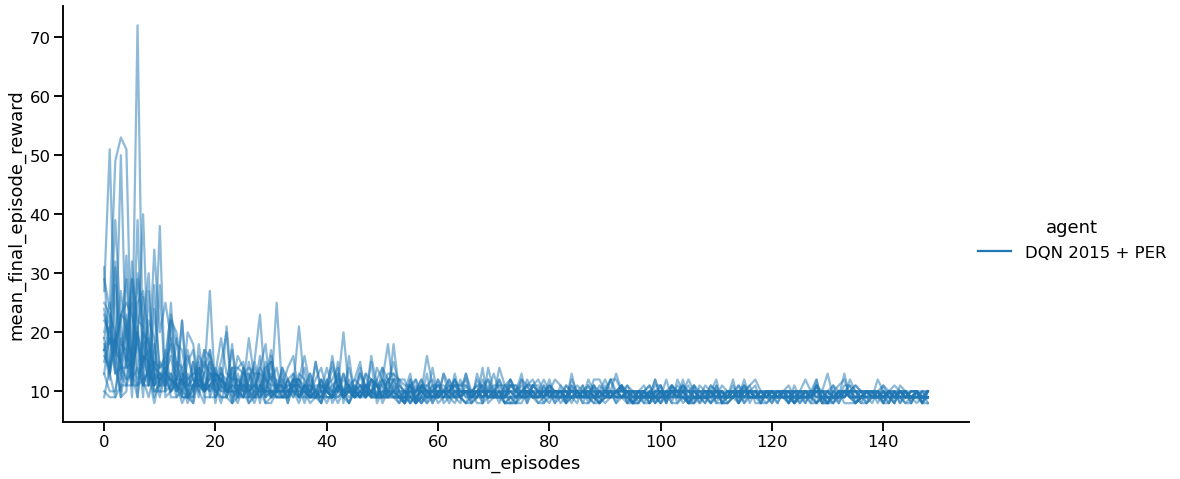

In [110]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", estimator=None, units="training_index", data=dqn_per_trains_result_df,
                height=7, aspect=2, alpha=0.5);

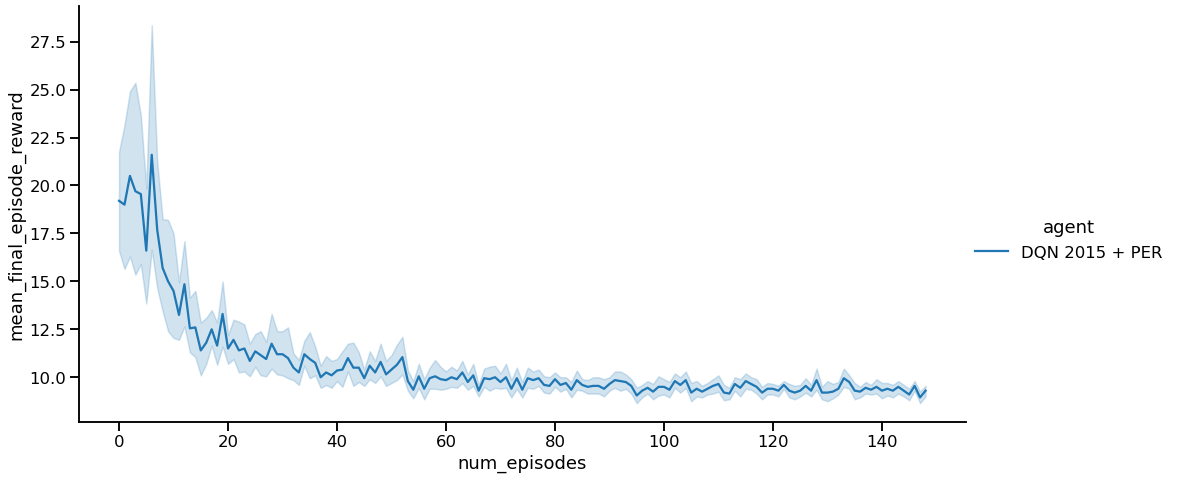

In [113]:
g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn_per_trains_result_df, height=7, aspect=2)

**Observations:** My algo runs with poor performance, because I think I have implemented the sample function incorrectly (when asked to calculate priorities, I just normalize the TD errors I have stored within `train_dqn-per` stored because I can't see what else to do, and I think I've got the weights calculation wrong). Then, in the train function, I don't see how to integrate the importance-sampling weights. Indeed, in the original article, they accumulate it in the delta variable, but I don't see anything similar in the framework of our code, and I don't know how to use the weights in the `loss_fn`.

### Test it

In [ ]:
# q_network = torch.load("dqn_per_q_network.pth").to(device)

env = gym.make('CartPole-v1', render_mode='rgb_array')
RenderWrapper.register(env, force_gif=True)

test_q_network_agent(env, q_network, num_episode=3)

env.close()

env.render_wrapper.make_gif("lab1_dqn_per_tained")

### Experimental results

**Task 6.2:** What do you observe? Why?

## Bonus: Gradient clipping

Gradient clipping is a technique used to tackle the problem of exploding gradients in deep learning, including in the context of Reinforcement Learning. In reinforcement learning, the distribution of rewards and therefore gradients can be highly variable. Large updates to the Q-network weights can destabilize training, leading to divergence. Gradient clipping limits the size of the weight updates, ensuring stable and more reliable learning. By preventing erratic and large updates, gradient clipping can help the learning process converge more smoothly and often more quickly to a stable policy. DQN uses experience replay to break the correlation between successive updates. However, the mixed nature of the experiences can lead to high variance in gradients. Clipping gradients in this context ensures that even if there is a harmful experience in the replay buffer, it does not disproportionately affect the learning process.

Gradient clipping can be implemented using `torch.nn.utils.clip_grad_value_` between the `loss.backward()` and the `optimizer.step()` as follow:

```python
loss.backward()
torch.nn.utils.clip_grad_value_(q_network.parameters(), clip_grad_value)  # In-place gradient clipping
optimizer.step()
```

**Task 7.1:** Implement gradient clipping in your existing DQN training routines. Once integrated, conduct a series of experiments to evaluate the impact of this technique on the learning stability and convergence of your models. Log the maximum gradient norm just before each update to the Q-network weights, providing a quantitative measure of the gradients' magnitude. Additionally, produce visualizations such as plots to illustrate the effect of gradient clipping on these norms over time.

In [72]:
# Doing that on DDQN

# 1 - Train without clipping to see the values

env = gym.make('CartPole-v1')

num_trains = 5
ddqn_trains_result_list = [[], [], []]
    # Train the q-network
all_gradient_values = []

for train_index in range(num_trains):

    # Instantiate required objects

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device) # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network.load_state_dict(q_network.state_dict()) # Initialize the target Q-network with the same weights as the Q-network

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)


    episode_reward_list, max_gradient_values = train_ddqn_agent(env,
                                           q_network,
                                           target_q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer,
                                           target_q_network_sync_period=30, 
                                           clip_info=True)
    all_gradient_values += max_gradient_values


env.close()

print(f'List of max grad values at each weights update: {all_gradient_values}')
print(f'Maximum gradient value: {max(all_gradient_values)}')

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

List of max grad values at each weights update: [0.0, 0.0, 0.0, 0.0, 0.0, 0.1558489352464676, 0.33942216634750366, 0.21463492512702942, 0.25980180501937866, 0.3643999695777893, 0.33918124437332153, 0.36751046776771545, 0.12511643767356873, 0.35976365208625793, 0.25843754410743713, 0.23875078558921814, 0.1774204969406128, 0.40410977602005005, 0.18689456582069397, 0.22018183767795563, 0.2495865523815155, 0.10802415013313293, 0.3381136357784271, 0.17635378241539001, 0.2863772213459015, 0.4434368908405304, 0.2798832952976227, 0.41910597681999207, 0.21692955493927002, 0.1599372774362564, 0.6007421016693115, 0.428277850151062, 0.5084055662155151, 0.3180205821990967, 0.2970455586910248, 0.3409869968891144, 0.21068255603313446, 0.13370053470134735, 0.29802465438842773, 0.18286636471748352, 0.14330832660198212, 0.6675964593887329, 0.19870054721832275, 0.42550137639045715, 0.2912842631340027, 0.36280420422554016, 0.23464685678482056, 0.11532904207706451, 0.1866883784532547, 0.1772119551897049, 0

In [73]:
# Using clippping gradient and compare the performance of classical DDQN 

######## SECOND TRAINING WITH CLIPPING #########

env = gym.make('CartPole-v1')

num_trains = 10
ddqn_trains_result_list_grad_clip = [[], [], []]

for train_index in range(num_trains):

    # Instantiate required objects

    q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device)
    target_q_network = QNetwork(state_dim, action_dim, nn_l1=128, nn_l2=128).to(device) # The target Q-network is used to compute the target Q-values for the loss function
    target_q_network.load_state_dict(q_network.state_dict()) # Initialize the target Q-network with the same weights as the Q-network

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    #lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(epsilon_start=0.82, epsilon_min=0.013, epsilon_decay=0.9675, env=env, q_network=q_network)

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list_grad_clip, max_gradient_values = train_ddqn_agent(env,
                                           q_network,
                                           target_q_network,
                                           optimizer,
                                           loss_fn,
                                           epsilon_greedy,
                                           device,
                                           lr_scheduler,
                                           num_episodes=150,
                                           gamma=0.9,
                                           batch_size=128,
                                           replay_buffer=replay_buffer,
                                           target_q_network_sync_period=30, 
                                           gradient_clipping=True, 
                                           clip_grad_value=1.25)
    ddqn_trains_result_list_grad_clip[0].extend(range(len(episode_reward_list_grad_clip)))
    ddqn_trains_result_list_grad_clip[1].extend(episode_reward_list_grad_clip)
    ddqn_trains_result_list_grad_clip[2].extend([train_index for _ in episode_reward_list_grad_clip])

ddqn_trains_result_grad_clip_df = pd.DataFrame(np.array(ddqn_trains_result_list_grad_clip).T, columns=["num_episodes", "mean_final_episode_reward", "training_index"])
ddqn_trains_result_grad_clip_df["agent"] = "DDQN with gradient clipping"

# SAVE THE ACTION-VALUE ESTIMATION FUNCTION

torch.save(q_network, "ddqn_q_network_grad_clip.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

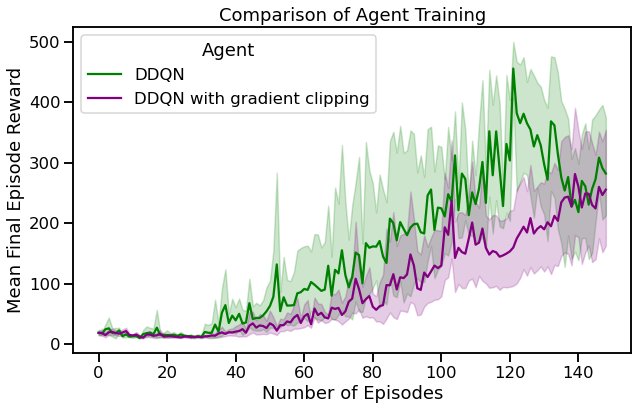

In [74]:
clipped_palette = {'DDQN with gradient clipping': 'purple'}
standard_palette = {'DDQN': 'green'}

# Plot the first graph
g = sns.lineplot(x="num_episodes", y="mean_final_episode_reward", hue="agent", data=ddqn_trains_result_df, palette=standard_palette)

# Plot the second graph on the same axes
f = sns.lineplot(x="num_episodes", y="mean_final_episode_reward", hue="agent", data=ddqn_trains_result_grad_clip_df, palette=clipped_palette)

# Set the title and labels for the axes
plt.title('Comparison of Agent Training')
plt.xlabel('Number of Episodes')
plt.ylabel('Mean Final Episode Reward')

# Display the legend
plt.legend(title='Agent')

# Set the size of the overall figure
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()

**Observation** We do not get far better results with gradient clipping, as the gradient in out DDQN does not explode (It stays below 1.25). This approach would be more rewarding when there are high gradients. Maybe precedent approaches (DQN with replay buffer, vanilla DQN, ....) will be more impacted by gradient clipping.

## Bonus: Putting everything together

In  2017, Henssel et al. performed a large experiment that combined several DQN enhancements, among them DDQN and PER (https://arxiv.org/abs/1710.02298). They found that the ehancements worked well together. The paper has become known as the Rainbow paper, since the major graph showing the cumulative performance over 57 Atrari games is multicolored.

In 2017, Hessel et al. conducted comprehensive research that amalgamated multiple advancements in Deep Q-Networks (DQN), including Double DQN (DDQN) and Prioritized Experience Replay (PER). Their findings indicated that these enhancements, when applied in tandem, yielded synergistic benefits. The seminal study is colloquially referred to as the 'Rainbow paper,' named after the multicolored graph that depicts the aggregate performance across 57 Atari games.

<img src="lab1_rainbow_curve.png" width="600px" />

**Task 7.2:** Integrate DDQN with PER to develop a new agent. Conduct a series of trials to evaluate the efficacy of this combination.

## Bonus: Test and train a DQN agent to play Atari games

Training a DQN agent from scratch on the Atari environment can take several tens of hours on a machine with a good GPU. Finding the right hyperparameters requires this training to be repeated many times. However, pre-trained agents can be used to test DQN on the Atari environment.

**Task 7.3**:
- Download the weights of a pre-trained DQN agent from https://rl-baselines3-zoo.readthedocs.io/en/master/
- Test the network in inference
- Randomize one of the layers of the network and retrain only this layer; use the same hyperparameters as in https://rl-baselines3-zoo.readthedocs.io/en/master/

## Further readings

### Dueling DDQN (DDDQN) : Advantage function

Dueling Double DQN (Dueling DDQN) is an enhancement over the standard DQN that aims to improve the quality of the learned value function (https://arxiv.org/abs/1511.06581). The motivation for Dueling DDQN lies in its architecture, which separately estimates two components: the value of being in a particular state (V(s)), and the advantage of taking a particular action in that state (A(s, a)).

In standard DQN, a single stream of network layers estimates the Q-value directly. In contrast, Dueling DDQN has two streams to separately estimate the value and advantage functions, which are then combined to calculate the Q-value. This allows the network to more effectively learn which states are (or are not) valuable without having to learn the effect of each action for each state. This is particularly useful in environments where the value of the state does not vary much across actions.

The separation of the estimation process helps in stabilizing learning and often leads to better policy evaluation, especially in cases where the action choice does not have a large impact on what happens next—making Dueling DDQN a more robust and often more efficient learning algorithm compared to the standard DQN.

### Distributional methods

Distributional Q-Learning enhances the standard DQN by modeling the entire distribution of possible future rewards, rather than simply estimating the expected reward (https://arxiv.org/abs/1707.06887). The motivation for Distributional Q-Learning stems from the insight that the uncertainty in rewards—and consequently in the value function—can provide valuable information that is not captured when only the mean expected reward is considered.

Standard DQN approximates the expected value of the total return (the sum of future discounted rewards) from a given state-action pair. However, this approach ignores the variability around this expected value. In contrast, Distributional Q-Learning represents the value function as a distribution over possible returns, capturing the full range of potential outcomes and their probabilities.

This richer representation allows the agent to distinguish between actions that may lead to the same expected reward but with different risks or variances in outcomes. It enables more informed decision-making in stochastic environments, where the variability of returns is as important as the expectation. By capturing the entire distribution, Distributional Q-Learning can also potentially converge faster and yield more robust policies, as it accounts for the variance in rewards that can be critical in the learning process.

### NoisyNets DQN

Noisy DQN introduces parametric noise directly into the weights of the neural network to drive exploration, as opposed to traditional methods like ϵϵ-greedy where the randomness is injected into the action selection process (https://arxiv.org/abs/1706.10295). The key motivation behind Noisy DQN is to enable more sophisticated and efficient exploration strategies.

In standard DQN, exploration is often implemented through ϵϵ-greedy policies that select random actions with a certain probability ϵϵ, which can be suboptimal and inefficient, especially as ϵϵ has to be carefully decayed over time to balance exploration with exploitation. This randomness is external and does not adapt based on the agent’s experience.

Noisy DQN, however, incorporates noise into the network’s parameters, making the policy itself stochastic. This approach allows the network to learn the degree of exploration needed from the environment feedback, as the noise can be learned and adapted during training. It provides a more nuanced exploration mechanism that can potentially learn to explore in a state-dependent manner, leading to faster and more robust convergence of the learning process.